In [51]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [23]:
df = pd.read_csv("/Users/pinnytu/Documents/IVEY MMA/Data Management/Session 8 python/consumer_complaints.csv")
df.head()

/var/folders/jv/zyr2xlrd0c3gh8pgkzngklrm0000gn/T/ipykernel_17483/1975326175.py:1: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/pinnytu/Documents/IVEY MMA/Data Management/Session 8 python/consumer_complaints.csv")


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


## Step 1: Distinguish Attributes

In [24]:
print(df.nunique())

date_received                     1608
product                             11
sub_product                         46
issue                               95
sub_issue                           68
consumer_complaint_narrative     65646
company_public_response             10
company                           3605
state                               62
zipcode                          27052
tags                                 3
consumer_consent_provided            4
submitted_via                        6
date_sent_to_company              1557
company_response_to_consumer         8
timely_response                      2
consumer_disputed?                   2
complaint_id                    555957
dtype: int64


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date_received                 555957 non-null  datetime64[ns]
 1   product                       555957 non-null  category      
 2   sub_product                   397635 non-null  object        
 3   issue                         555957 non-null  object        
 4   sub_issue                     212622 non-null  object        
 5   consumer_complaint_narrative  66806 non-null   object        
 6   company_public_response       85124 non-null   object        
 7   company                       555957 non-null  object        
 8   state                         551070 non-null  object        
 9   zipcode                       551452 non-null  object        
 10  tags                          77959 non-null   object        
 11  consumer_cons

## Step 2: Data Quality (missing values)

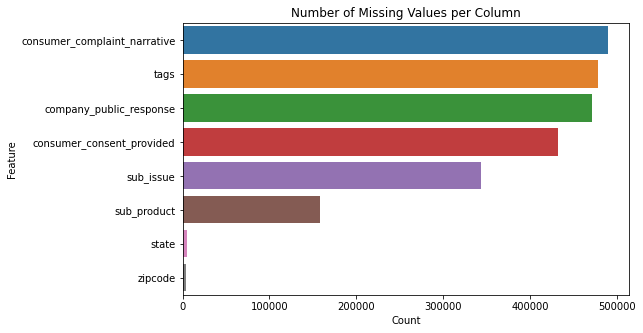

In [33]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(8, 5))
sns.barplot(x=missing_values.values, y=missing_values.index)

plt.title("Number of Missing Values per Column")
plt.xlabel("Count")
plt.ylabel("Feature")
plt.show()

In [29]:
df['date_received'] = df['date_received'].astype('datetime64[ns]')
df['date_sent_to_company'] = df['date_sent_to_company'].astype('datetime64[ns]')
df['product'] = df['product'].astype('category')
df['submitted_via'] = df['submitted_via'].astype('category')
df['company_response_to_consumer'] = df['company_response_to_consumer'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date_received                 555957 non-null  datetime64[ns]
 1   product                       555957 non-null  category      
 2   sub_product                   397635 non-null  object        
 3   issue                         555957 non-null  object        
 4   sub_issue                     212622 non-null  object        
 5   consumer_complaint_narrative  66806 non-null   object        
 6   company_public_response       85124 non-null   object        
 7   company                       555957 non-null  object        
 8   state                         551070 non-null  object        
 9   zipcode                       551452 non-null  object        
 10  tags                          77959 non-null   object        
 11  consumer_cons

## Step 3: Univariate Analysis 

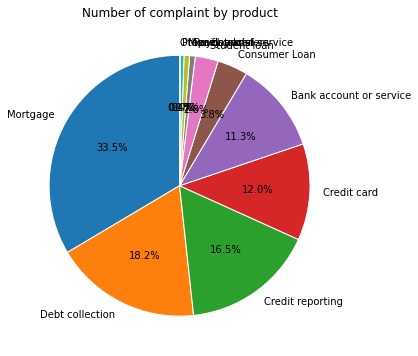

In [87]:
product_grp = df.groupby('product', sort=True)['complaint_id'].count()
product_grp= product_grp.sort_values(ascending=False)
product_grp = product_grp.reset_index()
product_grp.columns = ['product', 'complaint_count']

plt.figure(figsize=(6,6), facecolor='white')
plt.pie(
    product_grp['complaint_count'], 
    labels=product_grp['product'], 
    autopct='%1.1f%%',     
    startangle=90,        
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
plt.title("Number of complaints by product")
plt.show()




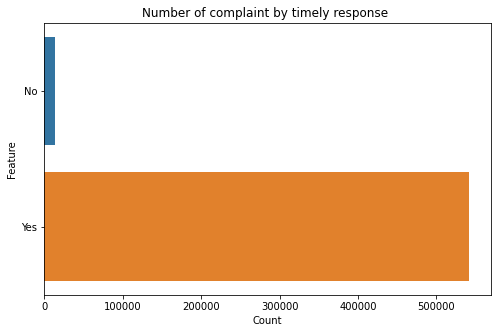

In [49]:
time_response = df.groupby('timely_response', sort = True)['complaint_id'].count()

plt.figure(figsize=(8, 5))
sns.barplot(x=time_response.values, y=time_response.index)

plt.title("Number of complaint by timely response ")
plt.xlabel("Count")
plt.ylabel("Feature")
plt.show()

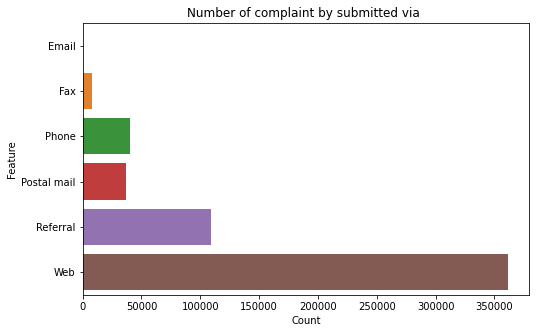

In [55]:
submitted_grp = df.groupby('submitted_via', sort=True)['complaint_id'].count()

plt.figure(figsize=(8, 5))
sns.barplot(x=submitted_grp.values, y=submitted_grp.index)

plt.title("Number of complaint by submitted via ")
plt.xlabel("Count")
plt.ylabel("Feature")
plt.show()

## Step 4: Multivariate Analysis


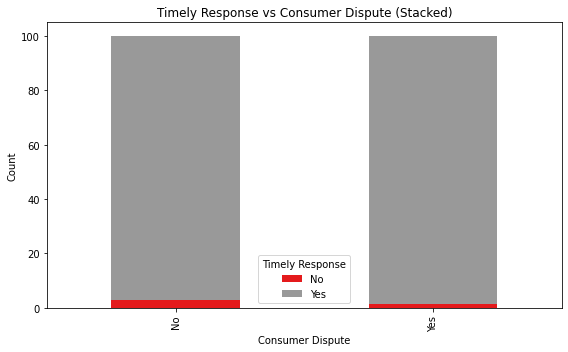

In [59]:
ct = pd.crosstab( df['consumer_disputed?'],df['timely_response'])

ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100

# 2. Plot stacked bar
ct_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5),
    colormap='Set1'
)

plt.title('Timely Response vs Consumer Dispute (Stacked)')
plt.xlabel('Consumer Dispute')
plt.ylabel('Count')
plt.legend(title='Timely Response')
plt.tight_layout()
plt.show()


## Step : Feature Engineering 

In [70]:
#new quarter
df['quarter'] = "Q" + df['date_received'].dt.quarter.astype(str)
df['year'] = df['date_received'].dt.year

df

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id,quarter,year
0,2013-08-30,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,2013-09-03,Closed with explanation,Yes,Yes,511074,Q3,2013
1,2013-08-30,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,2013-09-03,Closed with explanation,Yes,Yes,511080,Q3,2013
2,2013-08-30,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,2013-09-18,Closed with explanation,Yes,No,510473,Q3,2013
3,2013-08-30,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,2013-08-30,Closed with explanation,Yes,Yes,510326,Q3,2013
4,2013-08-30,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,2013-08-30,Closed with explanation,Yes,Yes,511067,Q3,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555952,2014-07-01,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,NaN,NaN,NaN,NaN,Referral,2014-07-07,Closed with explanation,Yes,No,919529,Q3,2014
555953,2014-07-01,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Residential Credit Solutions,NaN,NaN,"Older American, Servicemember",NaN,Referral,2014-07-23,Closed with explanation,No,No,918447,Q3,2014
555954,2012-07-10,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,BB&T Financial,NaN,NaN,NaN,NaN,Phone,2013-11-18,Closed with explanation,Yes,No,114550,Q3,2012
555955,2015-04-14,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,NaN,NaN,Global Recovery Group,NaN,NaN,NaN,NaN,Phone,2015-04-14,Untimely response,No,No,1329963,Q2,2015


In [83]:
qtr_compaint = df.groupby(['year', 'quarter'])['complaint_id'].count().reset_index()
avg_qtr = qtr_compaint.groupby('quarter')['complaint_id'].mean()

avg_qtr


quarter
Q1    32648.2
Q2    26726.6
Q3    33197.5
Q4    25258.6
Name: complaint_id, dtype: float64

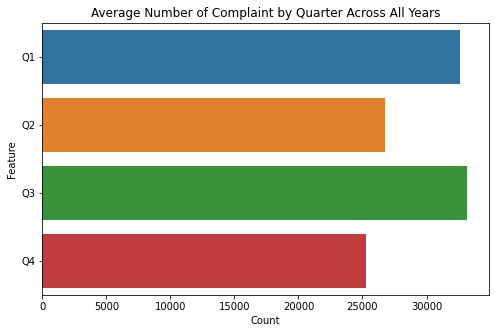

In [85]:

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_qtr.values, y=avg_qtr.index)

plt.title("Average Number of Complaint by Quarter Across All Years")
plt.xlabel("Count")
plt.ylabel("Feature")
plt.show()